<a href="https://colab.research.google.com/github/Lotfullah21/Deep-Learning/blob/main/Convolutional_Neural_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Convolutinal Neural Network**

Convolutional Networks are simly neural networks that use convolution in place of general matrix multiplication, in at least of their layers.
this is also the family of neural networks, But here we are using another approach to create the models which are invarient to certain transformation of the input to build the invarience properties into the structure of a neural network.
### The Convolution Operation:
Convolution is an operation on two function of real valued argument

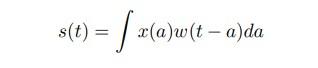.

the convolution is defined for any function for which the above integral is defined. Here the X(t) and W(t) are the position of the object at time t and the kernel respectively.
Kernel is a filter that extract meaningful features from an object.
the output of the above operation sometimes referred as feature map.

Convolution leverages three important ideas that help a machine learning system.
1. Sparse interactions
2. Parameter Sharing
3. Equivarient Representations.

## Why Convolutional Neural Net(CNN) ?
Bsically in most of the Machine learning task we are looking for meaningful features or patterns, and based on that we can predict the future event or detect an object and many more applications, in image data we do not need the precise location of an object, for exmple to detect the on a human being face, just we need eyes, it does not matter in which part of the image it appears, in other word, the location of pattern is not important, the presence of pattern is important, But Conventional networks are sensitive to location, if we train a network to detect an eye, then it will look the exact location of that eye that appered in the image, while testing if the eyes are not present in the location where the Net trained on,it will misclassify it.

if we want to that kind of network to perform well, then we need so much of training data to feed in.

We need a network that must be shift invarient, which means that by small changes, it should not effect our learning process.


the effect which convolution is going to have on our image is some of the feature might be given more importance as a result of convolution and that depends on kernel or filter values, for example in an image we might be interested more in horizinatal lines, so we will choose our filter value such that it extract the horizintal features.


## Advantage
they can process inputs with varying spatial extents, these kinds of inputs simply cannot be represented by tradational matrix multiplication-based neural nets.

it can be used to output a high_dimensional structured objects, rather than just predicting a class label.

We will use fashion_mnist dataset here as it is wideyl used and simple for understanding purpose

In [1]:
import tensorflow as tf

# Load the data 
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalizing the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

4431872/4422102 [==============================] - 0s 0us/step


### Pooling
Definition: A pooling function replaces the output of the network at a certain location with a summary statistics of nearby outputs.
this operation is done after the convolution operation, pooling+convolution makes our model much powerful in detecting and giving more importance to the detected features.
pooling is done to modify the output further after convolution operation, it helps to make the representation approximately invarient to small translations.

If an object in an image is at area A and through convolution a feature is detected at the output at area B, then the same feature would be detected when the object in the image is translated to A'.

invariance to translation can be useful if we care more about the presesnce of a feature rahter than its location.

Pooling also can be useful for handling the inputs of varying size, for example getting the images of different heights and widths or getting the speech of different length and it also it reduces the size of the parameters which can results in high speed and needing of less memory storage.

Here we use MaxPooling which takes maximum value after convolution operation and ignore the rest

When the task involves incorporating information from very distant locations in the input, then pooling might not be a good option, because the important features are far from each other we might ignore or loose those features during pooling.

In [2]:

model = tf.keras.models.Sequential([
                                                         
  # Adding convolutions 
  # 32 filters with each one 3 in heght and 3 in width
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  # Adding MaxPooling of size 2x2
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),


  # Adding Dense Layers and Flatten layer
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  
  # the output layer with 10 neurons each one represents a class.
  tf.keras.layers.Dense(10, activation='softmax')
])

We are Flattening our data,becuse the position doesn not matter here, just we need the presence of the information.

### Model Summary
we can have our model summary by summary method to observe what happened in our network during adding the hidden layers

In [3]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 32)         0

### Choosing the Hyperparameters and traing the model

Here also we use the Gradient descent algorithm, from that family the 'adam' one and the loss as ours categorical, we use categorical loss.

epochs means how many time we are going through entire data set, here we choose 10, means 10 time through training data to compute the losses and adjust the learnable parameters

In [4]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(training_images, training_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 17s 3ms/step - loss: 0.6592 - accuracy: 0.7553
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4495 - accuracy: 0.8349
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3885 - accuracy: 0.8568
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3530 - accuracy: 0.8691
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3263 - accuracy: 0.8789
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3057 - accuracy: 0.8867
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2891 - accuracy: 0.8920
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2785 - accuracy: 0.8966
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2657 - accuracy: 0.9008
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.25

### Evaluating the model on the test set

In [5]:
test_loss = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3460 - accuracy: 0.8748
